In [31]:
from platform import python_version
print(python_version())

3.11.0


In [32]:
import numpy as np
print(np.__version__)

2.4.1


In [33]:
import qiskit
print(qiskit.__version__)

1.3.2


In [34]:
# Import Qiskit Requirements
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [35]:
# Set the number of qubits
n = 1

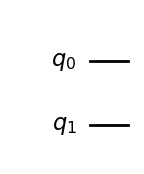

In [36]:
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)

if (output == 1):
    const_oracle.x(n)
    
const_oracle.draw('mpl')

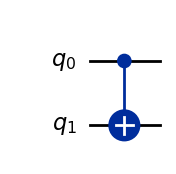

In [37]:
balanced_oracle = QuantumCircuit(n+1)
balanced_oracle.cx(0, n)

balanced_oracle.draw('mpl')

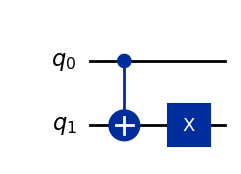

In [38]:
balanced_oracle2 = QuantumCircuit(n+1)
balanced_oracle2.cx(0, 1)
balanced_oracle2.x(n)

balanced_oracle2.draw('mpl')

In [39]:
def deutsch_function(case:int):
    
    if case not in [1,2, 3, 4]:
        raise ValueError("case error")
    
    f = QuantumCircuit(2)
    if case in [3,4]:
        f.cx(0,1)
    if case in [2,4]:
        f.x(1)

    return f

In [40]:
def compile_circuit(function: QuantumCircuit):
    
    qc = QuantumCircuit(2, 2)
    
    qc.x(1)
    
    qc.barrier()
    
    qc.h(0)
    qc.h(1)
    
    qc.compose(function, inplace=True)
    qc.barrier()
    
    qc.h(0)
    
    qc.measure(0, 0)
    
    return qc

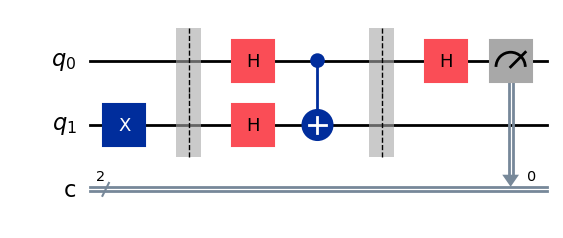

In [41]:
compile_circuit(deutsch_function(3)).draw('mpl')

In [42]:
def deutsch_algorithm (function: QuantumCircuit):
    
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc, shots=1024, memory=True).result()
    
    measurements = result.get_memory()
    
    counts = result.get_counts(qc)
    
    if measurements[0] == "0":
        print(counts)
        return 'constant', counts
    
    return 'balanced', counts


In [43]:
f = deutsch_function(3)
deutsch_algorithm(f)

('balanced', {'01': 1024})

In [44]:
f2 = deutsch_function(2)
deutsch_algorithm(f2)

('balanced', {'00': 1024})